# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [41]:
currentWeatherAPI = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

temperature = []
humidity = []
cloudiness = []
windSpeed = []
lat = []
cityID = []
cityName = []
maxTemp = []
lng = []
country = []
counter = 0
skipped = 0
# Build partial query URL
query_url = f"{currentWeatherAPI}appid={weather_api_key}&units={units}&q="
for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        windSpeed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        cityID.append(response['id'])
        cityName.append(response['name'])
        maxTemp.append(response['main']['temp_max'])
        country.append(response['sys']['country'])
        counter += 1
        print(f"processing record {counter}: {city}, {response['sys']['country']} ID: {response['id']}")
    else:
        skipped += 1
        print("skipping city")

print(f'Total processed: {counter + skipped}')
print(f'Total cities Found: {counter}')
print(f'Total cities not found: {skipped}')

processing record 1: new norfolk, AU ID: 2155415
processing record 2: albany, US ID: 5106841
skipping city
processing record 3: aquiraz, BR ID: 3407407
skipping city
processing record 4: tiksi, RU ID: 2015306
processing record 5: santiago, CL ID: 3871336
processing record 6: hilo, US ID: 5855927
processing record 7: loding, NO ID: 3147104
processing record 8: bluff, NZ ID: 2206939
skipping city
processing record 9: punta arenas, CL ID: 3874787
processing record 10: casper, US ID: 5820705
processing record 11: rikitea, PF ID: 4030556
skipping city
skipping city
processing record 12: san rafael, AR ID: 3836669
processing record 13: bredasdorp, ZA ID: 1015776
processing record 14: taltal, CL ID: 3870243
processing record 15: samsun, TR ID: 740263
processing record 16: ribeira grande, PT ID: 3372707
processing record 17: sambava, MG ID: 1056899
processing record 18: cherskiy, RU ID: 2126199
processing record 19: torbay, CA ID: 6167817
skipping city
processing record 20: kaputa, ZM ID: 1767

processing record 167: kondopoga, RU ID: 545626
processing record 168: longyearbyen, SJ ID: 2729907
processing record 169: vao, NC ID: 2137773
processing record 170: urumqi, CN ID: 1529102
processing record 171: nhulunbuy, AU ID: 2064735
processing record 172: kodiak, US ID: 5866583
skipping city
processing record 173: san quintin, MX ID: 3984997
processing record 174: itarema, BR ID: 3393692
processing record 175: udachnyy, RU ID: 2014624
processing record 176: puerto ayacucho, VE ID: 3629710
processing record 177: gashua, NG ID: 2341656
skipping city
processing record 178: oriximina, BR ID: 3393471
skipping city
processing record 179: kelvington, CA ID: 5990669
processing record 180: lamin, GM ID: 2412749
processing record 181: christchurch, NZ ID: 2192362
processing record 182: portland, US ID: 5746545
processing record 183: alvik, SE ID: 2696650
processing record 184: morant bay, JM ID: 3489440
processing record 185: castro, BR ID: 3466704
processing record 186: kamskiye polyany, R

processing record 333: parsons, US ID: 4277011
processing record 334: airai, TL ID: 1651810
processing record 335: taungdwingyi, MM ID: 1294041
processing record 336: urengoy, RU ID: 1488414
processing record 337: maymyo, MM ID: 1309937
processing record 338: sosnovo-ozerskoye, RU ID: 2016216
processing record 339: yichang, CN ID: 1786764
processing record 340: cartagena, CO ID: 3687238
processing record 341: shahdadpur, PK ID: 1165635
processing record 342: gimli, CA ID: 5961417
processing record 343: norman wells, CA ID: 6089245
skipping city
skipping city
processing record 344: russell, US ID: 4047434
processing record 345: marsabit, KE ID: 187585
processing record 346: kihei, US ID: 5849297
processing record 347: isangel, VU ID: 2136825
processing record 348: mandalgovi, MN ID: 2030065
processing record 349: kayes, ML ID: 2455517
processing record 350: batagay, RU ID: 2027044
processing record 351: zhigansk, RU ID: 2012530
processing record 352: comodoro rivadavia, AR ID: 3860443
p

processing record 501: havelock, US ID: 4470244
processing record 502: umm lajj, SA ID: 100926
processing record 503: santa fe, AR ID: 3836277
processing record 504: carastelec, RO ID: 682712
processing record 505: koutiala, ML ID: 2454268
processing record 506: itoman, JP ID: 1861280
processing record 507: crucea, RO ID: 680092
processing record 508: walla walla, US ID: 5814916
processing record 509: kharakvasla, IN ID: 1266966
processing record 510: falmouth, GB ID: 2649715
processing record 511: mackay, AU ID: 2159220
processing record 512: tanete, ID ID: 1629965
processing record 513: avera, US ID: 4231997
processing record 514: port hedland, AU ID: 2063042
processing record 515: kericho, KE ID: 192900
processing record 516: teguise, ES ID: 2510573
processing record 517: komsomolskiy, UZ ID: 1513491
processing record 518: west helena, US ID: 4135840
processing record 519: lakes entrance, AU ID: 2160735
processing record 520: numan, NG ID: 2328617
processing record 521: coahuayana, 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
cityWeatherDF = pd.DataFrame({'CityID': cityID,
                              'CityName': cityName,
                              'Country': country,
                              'Lat': lat,
                              'Lng': lng,
                              'Temperature': temperature,
                              'MaxTemp': maxTemp,
                              'Humidity': humidity,
                              'Cloudiness': cloudiness,
                              'WindSpeed': windSpeed})
cityWeatherDF.to_csv('city_weather.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

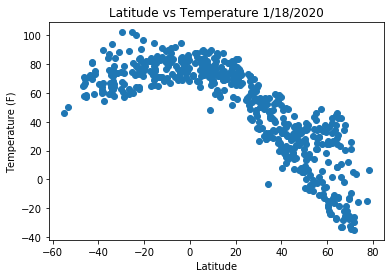

<Figure size 432x288 with 0 Axes>

In [43]:
x_values = cityWeatherDF['Lat']
y_values = cityWeatherDF['Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Latitude vs Temperature 1/18/2020')
plt.show()
plt.savefig('LatitudeTemp.png')

#in this graph, we are showing the relationshpi of temperature vs latitude. As expected, it is mostly hyperbolic.

#### Latitude vs. Humidity Plot

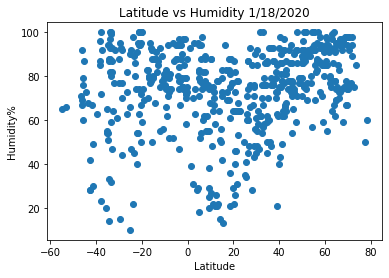

<Figure size 432x288 with 0 Axes>

In [44]:
x_values = cityWeatherDF['Lat']
y_values = cityWeatherDF['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity%')
plt.title('Latitude vs Humidity 1/18/2020')
plt.show()
plt.savefig('LatitudeHumidity.png')

#this plot is an attempt to show any patterns between humidity and latitude. While the chart is fairly spersed 
#you can still make out an expected pattern that the more positive or negative you go from the center, the more
#humid it is. You can also see that where you would expectedly get hotter, the humidity drops before shooting back up at center.


#### Latitude vs. Cloudiness Plot

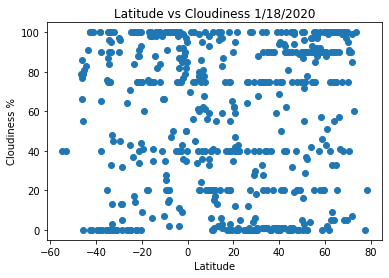

<Figure size 432x288 with 0 Axes>

In [45]:
x_values = cityWeatherDF['Lat']
y_values = cityWeatherDF['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Latitude vs Cloudiness 1/18/2020')
plt.show()
plt.savefig('LatitudeClouds.png')

#this plot is interesting. I expected there to be a direct corelation of clouds to latitude, as it relates to humitidy.
#this tries to demonstrate that correlation though interesting to note that there are horizontal trends, not vertical.

#### Latitude vs. Wind Speed Plot

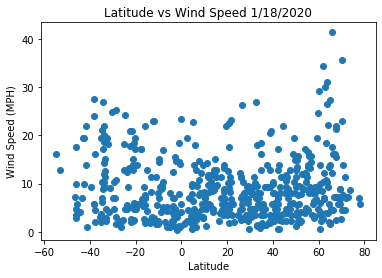

<Figure size 432x288 with 0 Axes>

In [46]:
x_values = cityWeatherDF['Lat']
y_values = cityWeatherDF['WindSpeed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('Latitude vs Wind Speed 1/18/2020')
plt.show()
plt.savefig('LatitudeWindSpeed.png')
#this plot attempts to show correlation between wind speed and latitude. There seemingly is none as regardless of latitude,
#the normal is tightly packed with a few outliers.

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots


In [10]:
# Create Northern and Southern Hemisphere DataFrames
northSideDF = cityWeatherDF[cityWeatherDF['Lat'] > 0]
southSideDF = cityWeatherDF[cityWeatherDF['Lat'] < 0]
southSideDF


,CityID,CityName,Country,Lat,Lng,Temperature,MaxTemp,Humidity,Cloudiness,WindSpeed
0,2155415,New Norfolk,AU,-42.78,147.06,82.96,84.99,25,100,24.16
2,3407407,Aquiraz,BR,-3.90,-38.39,82.24,82.40,74,40,5.82
4,3871336,Santiago,CL,-33.46,-70.65,67.95,70.00,59,0,9.17
7,2206939,Bluff,NZ,-46.60,168.33,74.62,74.62,49,71,6.93
8,3874787,Punta Arenas,CL,-53.15,-70.92,50.00,50.00,66,40,12.75
...,...,...,...,...,...,...,...,...,...,...
547,3892454,Diego de Almagro,CL,-26.37,-70.05,58.96,58.96,63,0,1.92
550,2180815,Tuatapere,NZ,-46.13,167.68,65.62,65.62,67,66,3.42
551,897456,Sinazongwe,ZM,-17.26,27.46,75.61,75.61,70,76,6.73
553,2191562,Dunedin,NZ,-45.87,170.50,68.54,70.00,70,79,17.90


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7396291682385722


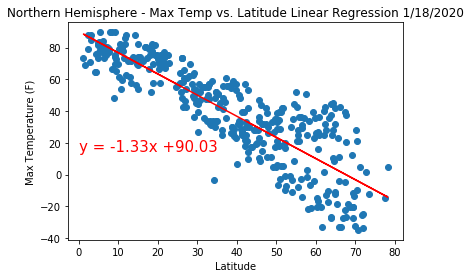

<Figure size 432x288 with 0 Axes>

In [48]:
x_values = northSideDF['Lat']
y_values = northSideDF['MaxTemp']

# Perform a linear regression on Max Temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression 1/18/2020')
plt.annotate(line_eq,(0,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('LatitudeTempNorthRegression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.25x +80.82
The r-squared is: 0.11976590787951544


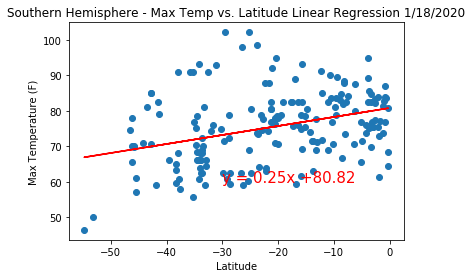

<Figure size 432x288 with 0 Axes>

In [49]:
x_values = southSideDF['Lat']
y_values = southSideDF['MaxTemp']

# Perform a linear regression on Max Temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression 1/18/2020')
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('LatitudeTempSouthRegression.png')

In [13]:
#The 2 plots show corelation between the max recorded temperature given latitude. As you can expect,
#the temperature rises the closer to 0 latitude we get, and lowers when we move away.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.39x +59.79
The r-squared is: 0.18158751247621419


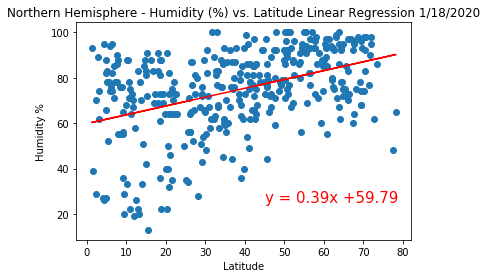

<Figure size 432x288 with 0 Axes>

In [50]:
x_values = northSideDF['Lat']
y_values = northSideDF['Humidity']

# Perform a linear regression on Max Temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression 1/18/2020')
plt.annotate(line_eq,(45,25),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('LatitudeHumidityNorthRegression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.36x +82.87
The r-squared is: 0.0668512946918144


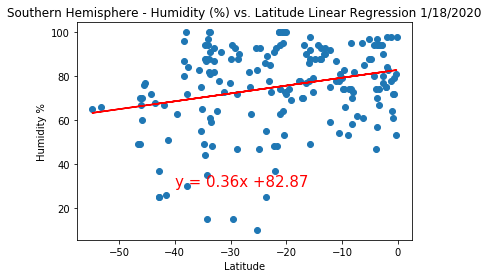

<Figure size 432x288 with 0 Axes>

In [51]:
x_values = southSideDF['Lat']
y_values = southSideDF['Humidity']

# Perform a linear regression on Max Temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression 1/18/2020')
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('LatitudeHumiditySouthRegression.png')

In [16]:
#these plots attempt to show correlation between humidity and latitude one for nothern and one for southern hemisphere.
# there is very minimal correlation, but on both north and southern plots, we can see a hyperbolic dip in temperatures
# in the 10-40 bands respectively. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.47x +35.15
The r-squared is: 0.0584557042874011


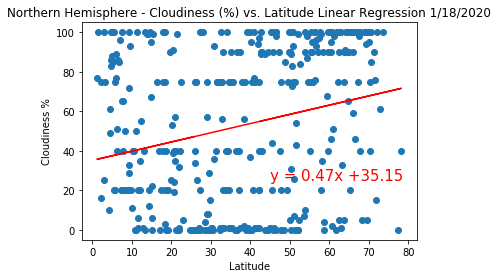

<Figure size 432x288 with 0 Axes>

In [52]:
x_values = northSideDF['Lat']
y_values = northSideDF['Cloudiness']

# Perform a linear regression on Max Temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression 1/18/2020')
plt.annotate(line_eq,(45,25),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('LatitudeCloudsNorthRegression.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.31x +66.79
The r-squared is: 0.012828168779079467


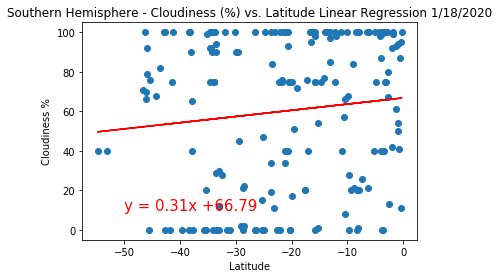

<Figure size 432x288 with 0 Axes>

In [53]:
x_values = southSideDF['Lat']
y_values = southSideDF['Cloudiness']

# Perform a linear regression on Max Temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression 1/18/2020')
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('LatitudeCloudsSouthRegression.png')

In [19]:
#This attempts to show any differences or similarities between the north and south in relations to cloudiness. As with the
#overall plot, there seems to be a lack of trends in regard to latitude, but definitely some trend lines in regards to
# the amount of cloudiness points at specicific %s regardless of the latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.05x +6.3
The r-squared is: 0.03309195196634163


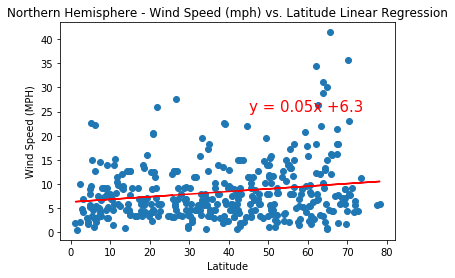

<Figure size 432x288 with 0 Axes>

In [54]:
x_values = northSideDF['Lat']
y_values = northSideDF['WindSpeed']

# Perform a linear regression on Max Temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.annotate(line_eq,(45,25),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('LatitudeWindSpeedNorthRegression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.13x +6.21
The r-squared is: 0.07183514325071767


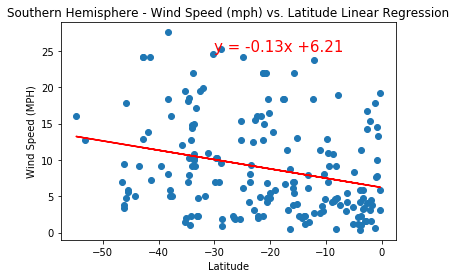

<Figure size 432x288 with 0 Axes>

In [55]:
x_values = southSideDF['Lat']
y_values = southSideDF['WindSpeed']

# Perform a linear regression on Max Temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('LatitudeWindSpeedSouthRegression.png')

In [22]:
#northern and southern hemisphere both seem to have a lot of data bunched in the same wind speed range. This to me would be
#expected as human life and wildlife would likely have issues living in habitats of high wind speeds. There are a couple outliers
#likely in cities more costal or devoid of major life, they would be the outliers.